Notebook: italian_airbnb_superhost_logistic_regression.ipynb
-----------------------------------------------------------
Title: Italian Airbnb Superhost Analysis – Logistic Regression
-----------------------------------------------------------

### Logistic Regression Analysis: Predicting Superhost Status

### Note to Tutor
Following your feedback on the previous task, I researched and implemented a **classification approach** using logistic regression to better model the binary target `is_top_host`. This notebook walks through all steps of the analysis, from data preparation to model evaluation.

---

## Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay)

## Load the Dataset

In [2]:
path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\Achievement 6\10-2025 Italian Airbnb'

In [3]:
df_airbnb = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'italian_airbnbs_cleaned.csv'))

## Logistic Regression Model (Feedback-Based Improvement)

### Objective
After receiving feedback that the target variable `is_top_host` is binary, further research confirmed that **linear regression** is not the most suitable approach for this type of prediction.  
Binary outcomes should be modeled using **Logistic Regression**, which is designed for classification problems and predicts the *probability* of belonging to a certain class (in this case, being a superhost).

### Implementation
To address this, a logistic regression model was applied using the same independent variables tested previously in the multiple linear regression model.


### Select features and target
**What I'm keeping:** the same features used in the multiple linear regression so results are comparable.

In [6]:
# 2) Features and target
features = [
    'rating_score', 'accuracy_score', 'cleanliness_score', 'checkin_score',
    'communication_score', 'location_score', 'value_for_money_score',
    'host_experience_years'
]

X = df_airbnb[features].copy()
y = df_airbnb['is_top_host'].copy()  # 0/1

# Quick sanity check
X.shape, y.shape

((92163, 8), (92163,))

### Handle missing values 
Check and drop or impute. In our cleaned dataset we expect no missing values, but check anyway.

In [8]:
# 3) Missing value check
print("Missing values in features:\n", X.isnull().sum())
print("\nMissing values in target:", y.isnull().sum())

# If there were missing values you could do:
# X = X.fillna(X.median())   # simple median imputation example

Missing values in features:
 rating_score             0
accuracy_score           0
cleanliness_score        0
checkin_score            0
communication_score      0
location_score           0
value_for_money_score    0
host_experience_years    0
dtype: int64

Missing values in target: 0


I use `df_airbnb` as the dataset. Missing values were checked and none were found for the selected features or target.

Only features related to host ratings and experience are included, as they are most relevant to superhost status.

### Exploratory Visualization

A scatterplot with jitter can help inspect relationships between each numeric feature and superhost status.

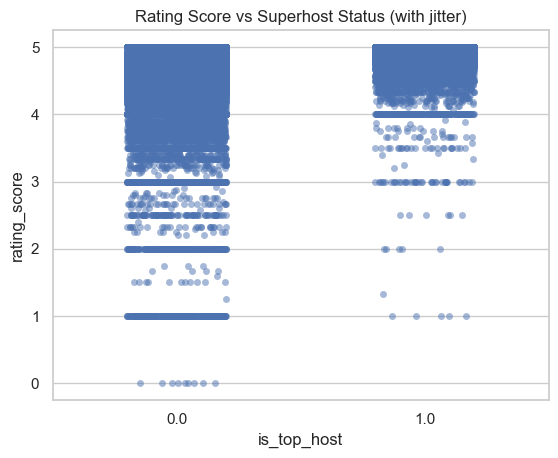

In [24]:
# Rating_score
sns.stripplot(x='is_top_host', y='rating_score', data=df_airbnb, jitter=0.2, alpha=0.5)
plt.title("Rating Score vs Superhost Status (with jitter)")
plt.show()

### Train / test split
Create training and test sets (keep random_state for reproducibility).

The data is split into training and test sets, preserving the proportion of superhosts.

In [10]:
# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((73730, 8),
 (18433, 8),
 np.float64(0.3100773091007731),
 np.float64(0.3100960234362285))

In [11]:
# Set plotting style
sns.set(style="whitegrid")

### Feature scaling
Logistic Regression benefits from scaled features. We'll standardize using `StandardScaler`.

Features are standardized to ensure the model treats them on the same scale.

In [13]:
# 5) Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit Logistic Regression
Fit logistic regression to the training data.

A logistic regression model is trained on the standardized training set.

In [16]:
# 6) Train logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Predictions & predicted probabilities
We will obtain both hard predictions (0/1) and predicted probabilities for ROC/AUC.

Predictions are made on the test set, including probabilities for each class.

In [17]:
# 7) Predict
y_pred = log_reg.predict(X_test_scaled)             # class labels
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # probability for class 1

### Evaluation metrics
Print accuracy, classification report, confusion matrix, and ROC-AUC.

Model performance is evaluated using accuracy, ROC-AUC, confusion matrix, and classification report.

In [18]:
# 8) Metrics
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Accuracy: 0.6765
ROC-AUC: 0.6923

Confusion Matrix:
 [[12062   655]
 [ 5308   408]]

Classification Report:
               precision    recall  f1-score   support

         0.0     0.6944    0.9485    0.8018     12717
         1.0     0.3838    0.0714    0.1204      5716

    accuracy                         0.6765     18433
   macro avg     0.5391    0.5099    0.4611     18433
weighted avg     0.5981    0.6765    0.5905     18433



### ROC curve
Visualize the ROC curve to inspect true positive vs false positive tradeoff.

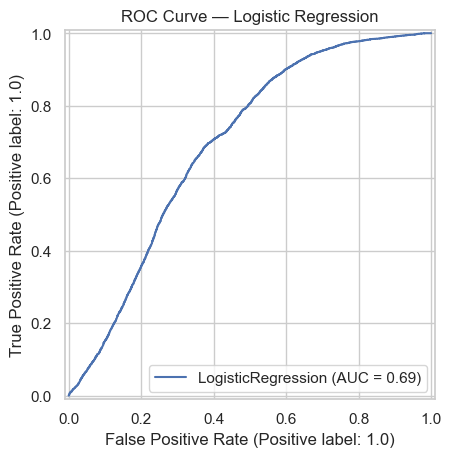

In [19]:
# 9) ROC curve plot
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title("ROC Curve — Logistic Regression")
plt.show()

### Precision-Recall curve
Useful when classes are imbalanced (inspect precision vs recall).

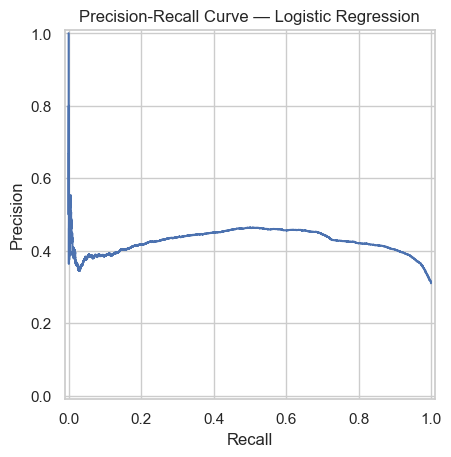

In [20]:
# 10) Precision-Recall curve
prec, recall, _ = precision_recall_curve(y_test, y_pred_proba)
PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title("Precision-Recall Curve — Logistic Regression")
plt.show()

### Compare Actual vs Predicted probabilities (a small table)
Show a few rows — actual label, predicted class, predicted probability.

In [21]:
# 11) Comparison table
df_comp = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted_label': y_pred,
    'Predicted_proba': np.round(y_pred_proba, 4)
})
df_comp.reset_index(drop=True).head(15)

,Actual,Predicted_label,Predicted_proba
0,1.0,0.0,0.4521
1,1.0,0.0,0.3697
2,0.0,0.0,0.4538
3,1.0,1.0,0.5181
4,0.0,0.0,0.1366
5,0.0,0.0,0.0570
6,0.0,0.0,0.2837
7,0.0,0.0,0.4762
8,0.0,0.0,0.0000
9,1.0,0.0,0.4684


### Coefficients interpretation (which features increase/decrease odds)
We can inspect coefficients to see which features are associated with higher odds of being a top host.

The logistic regression coefficients indicate which features most influence the likelihood of a host being a superhost.

In [23]:
# 12) Coefficients
coef = pd.DataFrame({
    'feature': features,
    'coefficient': log_reg.coef_[0]
}).sort_values(by='coefficient', ascending=False)

coef

,feature,coefficient
0,rating_score,0.539786
4,communication_score,0.429029
2,cleanliness_score,0.367950
7,host_experience_years,0.279020
3,checkin_score,0.067515
5,location_score,0.044540
6,value_for_money_score,0.037064
1,accuracy_score,0.024304


**Key Insights:**
- Features like **rating_score**, **communication_score**, **cleanliness_score**, and **host_experience_years** strongly increase the probability of a host being a superhost.
- The model predicts non-superhosts well but struggles with superhosts due to class imbalance (precision/recall issues).
- **Accuracy:** ~0.68, **ROC-AUC:** ~0.69, indicating moderate performance.

**Reflection:**
- Logistic regression is appropriate for this binary classification problem.
- This new approach was implemented after researching the feedback from the tutor, acknowledging that regression was not ideal for a 0/1 target.
- Future improvements could include balancing the dataset, trying more advanced models, or adding additional features to better capture superhost determinants.
